In [53]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [54]:
# 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력

df = pd.read_excel('subway.xls',sheet_name='지하철 시간대별 이용현황', header=[0,1])
hop_off_df = df.iloc[ : , [1,3,11,13]]
hop_off_df

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,"105,313","218,007"
1,1호선,시청,"63,969","182,565"
2,1호선,종각,"98,556","244,858"
3,1호선,종로3가,"23,309","61,562"
4,1호선,종로5가,"38,726","90,539"
...,...,...,...,...
616,신림선,당곡,"3,345","8,281"
617,신림선,신림,"1,313","2,640"
618,신림선,서원,"1,166","2,085"


In [55]:

hop_off_df[('07:00:00~07:59:59', '하차')] =	hop_off_df[('07:00:00~07:59:59', '하차')].apply(lambda x	: x.replace(',',''))
hop_off_df[('08:00:00~08:59:59', '하차')] = hop_off_df[('08:00:00~08:59:59',	'하차')].apply(lambda x : x.replace(',',''))

hop_off_df.head()

C:\Users\KDP-26\AppData\Local\Temp\ipykernel_5048\1020140630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hop_off_df[('07:00:00~07:59:59', '하차')] =	hop_off_df[('07:00:00~07:59:59', '하차')].apply(lambda x	: x.replace(',',''))
C:\Users\KDP-26\AppData\Local\Temp\ipykernel_5048\1020140630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hop_off_df[('08:00:00~08:59:59', '하차')] = hop_off_df[('08:00:00~08:59:59',	'하차')].apply(lambda x : x.replace(',',''))


,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,105313,218007
1,1호선,시청,63969,182565
2,1호선,종각,98556,244858
3,1호선,종로3가,23309,61562
4,1호선,종로5가,38726,90539


In [56]:
hop_off_df = hop_off_df.astype({('07:00:00~07:59:59', '하차'):'int64'})
hop_off_df = hop_off_df.astype({('08:00:00~08:59:59', '하차'):'int64'})
hop_off_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   (호선명, Unnamed: 1_level_1)   621 non-null    object
 1   (지하철역, Unnamed: 3_level_1)  621 non-null    object
 2   (07:00:00~07:59:59, 하차)     621 non-null    int64 
 3   (08:00:00~08:59:59, 하차)     621 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 19.5+ KB


In [57]:
hop_off_df['총하차인원']=hop_off_df[('07:00:00~07:59:59', '하차')]+ hop_off_df[('08:00:00~08:59:59', '하차')]
hop_off_df.head()

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,총하차인원
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차,
0,1호선,서울역,105313,218007,323320
1,1호선,시청,63969,182565,246534
2,1호선,종각,98556,244858,343414
3,1호선,종로3가,23309,61562,84871
4,1호선,종로5가,38726,90539,129265


In [63]:
line_list=hop_off_df[hop_off_df.columns[0]].unique().tolist()
line_list.sort()

line_list=line_list[:7]

busy_destination = []

for line in line_list:
    tmpDF임시저장소 = hop_off_df[hop_off_df[hop_off_df.columns[0]] == line]
    value최대값= tmpDF임시저장소[tmpDF임시저장소.columns[-1]].max()
    value행위치 = tmpDF임시저장소[tmpDF임시저장소.columns[-1]].idxmax()
    name역명 = hop_off_df.iloc[value행위치, 1]
    busy_destination.append([line, name역명, value최대값])

busy_destination

[['1호선', '종각', 343414],
 ['2호선', '역삼', 448033],
 ['3호선', '양재(서초구청)', 308476],
 ['4호선', '충무로', 221021],
 ['5호선', '여의도', 334282],
 ['6호선', '공덕', 129775],
 ['7호선', '가산디지털단지', 481268]]

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1호선 종각'),
  Text(1, 0, '2호선 역삼'),
  Text(2, 0, '3호선 양재(서초구청)'),
  Text(3, 0, '4호선 충무로'),
  Text(4, 0, '5호선 여의도'),
  Text(5, 0, '6호선 공덕'),
  Text(6, 0, '7호선 가산디지털단지')])

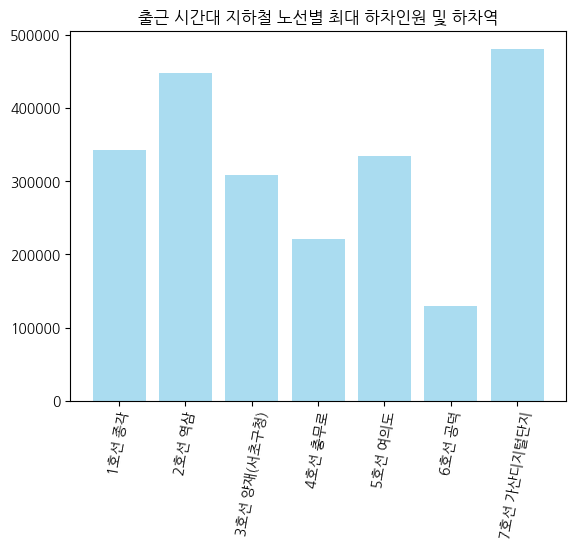

In [78]:
plt.bar([f'{i[0]+" "+i[1]}' for i in busy_destination], [i[2] for i in busy_destination], color='skyblue'
         , alpha=0.7)
plt.title('출근 시간대 지하철 노선별 최대 하차인원 및 하차역')
plt.xticks(rotation=80)